In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
tennis = pd.read_csv('/Users/salilketkar/thinkful/DS_Unit2/atp_matches_2017.csv')

In [4]:
#removing rows where surface is 'None'
tennis = tennis[~tennis['surface'].isin(['None'])]
tennis = tennis[~tennis['winner_hand'].isin(['U'])]

tennis.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2017-M020,Brisbane,Hard,32,A,20170102,300,105777,7.0,NaN,...,7.0,4.0,0.0,69.0,49.0,36.0,9.0,12.0,2.0,5.0
1,2017-M020,Brisbane,Hard,32,A,20170102,299,105777,7.0,NaN,...,0.0,4.0,3.0,61.0,28.0,24.0,16.0,10.0,2.0,4.0
2,2017-M020,Brisbane,Hard,32,A,20170102,298,105453,3.0,NaN,...,5.0,9.0,2.0,61.0,37.0,27.0,10.0,10.0,0.0,2.0
3,2017-M020,Brisbane,Hard,32,A,20170102,297,105683,1.0,NaN,...,7.0,4.0,0.0,84.0,61.0,39.0,14.0,14.0,2.0,4.0
4,2017-M020,Brisbane,Hard,32,A,20170102,296,105777,7.0,NaN,...,14.0,6.0,5.0,82.0,37.0,29.0,24.0,14.0,4.0,7.0


## Exploring the data

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


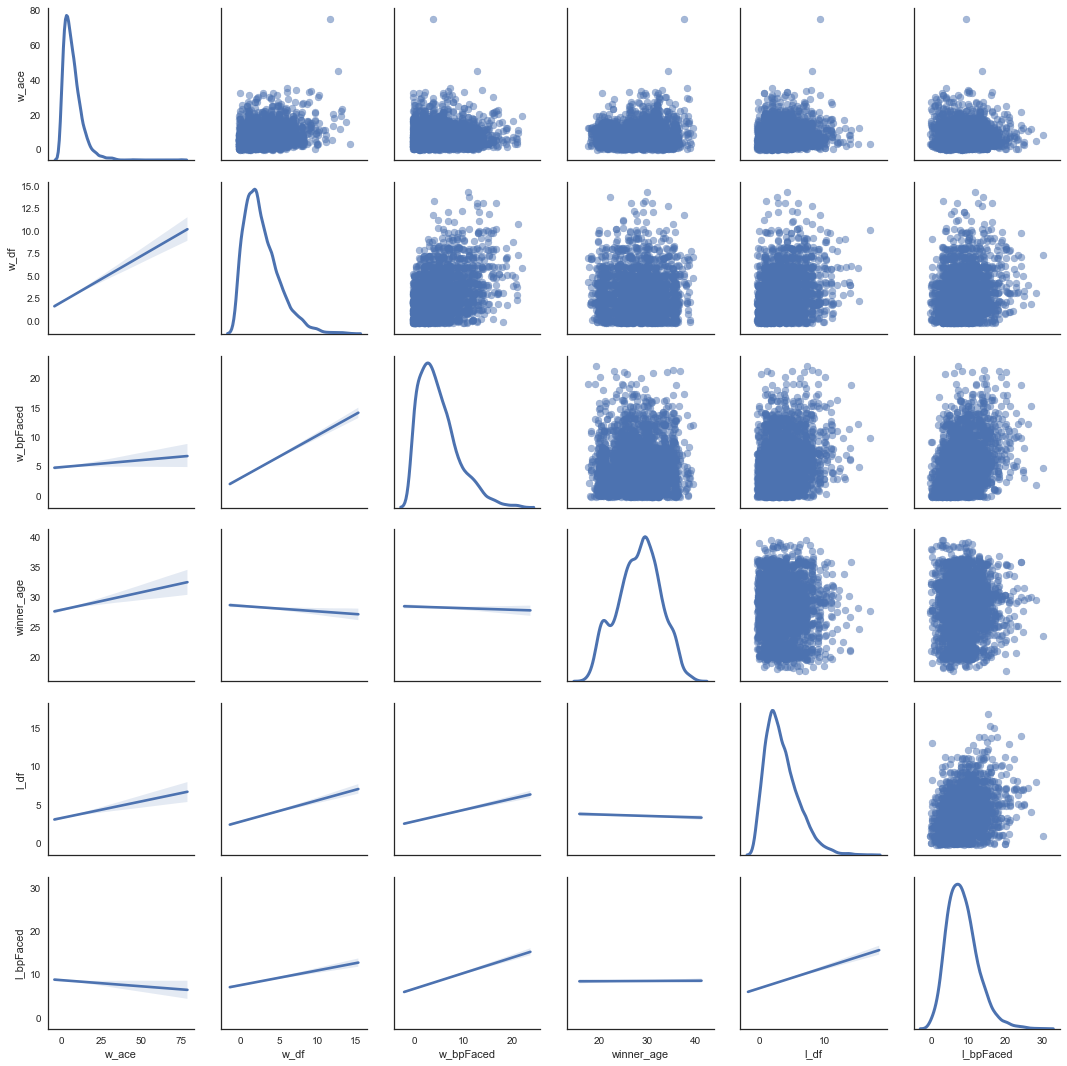

In [5]:
sns.set(style = 'white')

tennis_update = tennis[['surface','w_ace','w_df','w_bpFaced','winner_age','l_df','l_bpFaced']]
tennis_update2 = tennis[['w_ace','w_df','w_bpFaced','winner_age','l_df','l_bpFaced']]
df_jittered = tennis_update.loc[:,'w_ace':'l_bpFaced'].dropna()
jitter = pd.DataFrame(np.random.uniform(-.3,.3,size=(df_jittered.shape)), columns = df_jittered.columns)

df_jittered = df_jittered.add(jitter)

g = sns.PairGrid(df_jittered.dropna(), diag_sharey= False)

g.map_upper(plt.scatter, alpha=0.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

               w_ace      w_df  w_bpFaced  winner_age      l_df  l_bpFaced
w_ace       1.000000  0.251457   0.032803    0.065136  0.105874  -0.030780
w_df        0.251457  1.000000   0.409713   -0.048479  0.261409   0.199138
w_bpFaced   0.032803  0.409713   1.000000   -0.023350  0.239157   0.359784
winner_age  0.065136 -0.048479  -0.023350    1.000000 -0.036347   0.000007
l_df        0.105874  0.261409   0.239157   -0.036347  1.000000   0.291090
l_bpFaced  -0.030780  0.199138   0.359784    0.000007  0.291090   1.000000


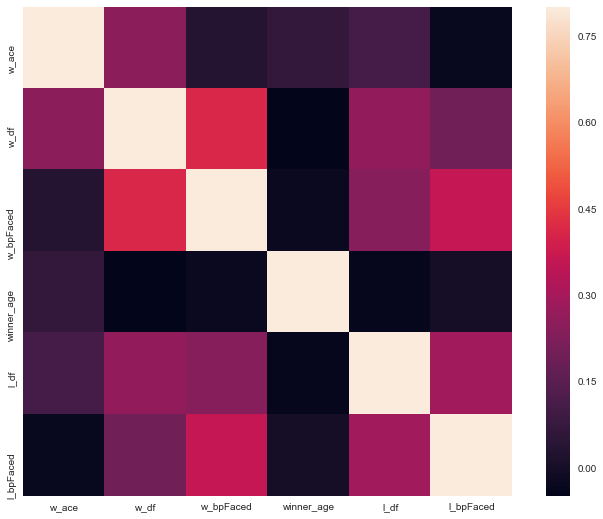

In [6]:
corrmat = tennis_update.corr()
print(corrmat)

f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

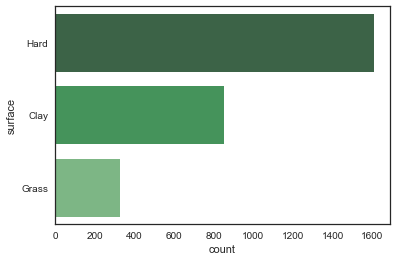

In [9]:
sns.countplot(y='surface', data=tennis_update, palette = 'Greens_d')
plt.show()


## Feature Engineering

These particular features were chosen because I believe they are some of the more important statistics regarding a tennis match.  They all have a large hand in determining the outcome of a match.

In [28]:

from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = pd.get_dummies(data=tennis_update,columns=['surface'])
features['grass'] = np.where((tennis_update['surface'].isin(['Grass'])), 1, 0)
features['clay'] = np.where((tennis_update['surface'].isin(['Clay'])), 1, 0)
features['hard'] = np.where((tennis_update['surface'].isin(['Hard'])), 1, 0)
features['teen'] = np.where(tennis_update['winner_age'] < 20, 1, 0)
features['older'] = np.where(tennis_update['winner_age'] >= 35, 1, 0)
features['doublef'] = np.where((tennis_update['w_df'] > 0) & (tennis_update['l_df'] > 0), 1, 0)
features['aces'] = np.where(tennis_update['w_ace'] > 7, 1, 0)
features['w_bpFaced'] = np.where(tennis_update['w_bpFaced'] > 5, 1, 0)
features['l_bpFaced'] = np.where(tennis_update['l_bpFaced'] > 5, 1, 0)




features1 = features[['grass','clay','hard','teen','older','doublef','aces','w_bpFaced','l_bpFaced']]
features1.dropna()

pca = PCA(n_components=9)
fittedData = pca.fit_transform(features1)
print(pca.explained_variance_ratio_)

[2.86623045e-01 1.83244517e-01 1.63844840e-01 1.15505881e-01
 9.61943926e-02 9.14943808e-02 4.43651208e-02 1.87278219e-02
 3.93635151e-33]


'grass', 'clay', 'hard', 'teen', and 'older' are the five best features of this data set justified by the PCA performed above.  